
##Introduction

In our project, we aim to describe past records of patients having heart disease. In this project,
we will use Kaggle, one of the most preferred options in these processes, to create a data set
that can be predicted based on old records of people with heart disease.

##Problem Definiton

Our finish goal is to somehow predict the heart disease situation of the people using the data given us. We will use Machine Learning methods to properly acquire and catch the correct information from the datasets.

### Utilized Datasets

* We are given a dataset of 303 patients with their “Age”, “Sex”, “Chest Pain”, “RestBP”, ”Chol”, “Fbs”, “RestECG”, “MaxHR”, “ExAng”, “Oldpeak”, “Slope”, “Ca”, “Thal”, “AHD”. By analyzing the data our aim is to find correlation between this quantities. Such as realtionship with AHD and age, sex and age or relationship between each attribute (without AHD) and chest pain.

* Besides we have used the additional datasets given to further understand the relation between the given aspects and the heart disease situation of the patients.

## Data Exploration

There are several different information for each data in the dataset. First of all, we wanted to see a correlation between the aspects given in the main datasets such as sex, ADH levels and heart disease. For each situation we had to calculate the ratio of the heart disease . Another implementation we did was to find additional aspects and to further understand and improve our prediction with the additional datasets.

## Implementation

In [11]:
#READ DATABASES
from google.colab import drive
#drive.mount("./drive", force_remount=True)
path_prefix = "/content"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import missingno    # print lib for better visual.

pd.set_option('max_rows', 5)
%matplotlib inline
fname = "dataset.csv"
#Additional datasets below.
fname2 = "dataset1.csv"
fname3 = "dataset2.csv"
fname4 = "dataset3.csv"

df = pd.read_csv(join(path_prefix, fname))
df2 = pd.read_csv(join(path_prefix, fname2))
df3 = pd.read_csv(join(path_prefix, fname3))
df4 = pd.read_csv(join(path_prefix, fname4))


In [6]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
df3

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df4

,Symptom,weight
0,itching,1
1,skin_rash,3
...,...,...
131,yellow_crust_ooze,3
132,prognosis,5


## Editing the datasets to deal with the data effiecently.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB
None

Age             0
Sex             0
               ..
ST_Slope        0
HeartDisease    0
Length: 12, dtype: int64



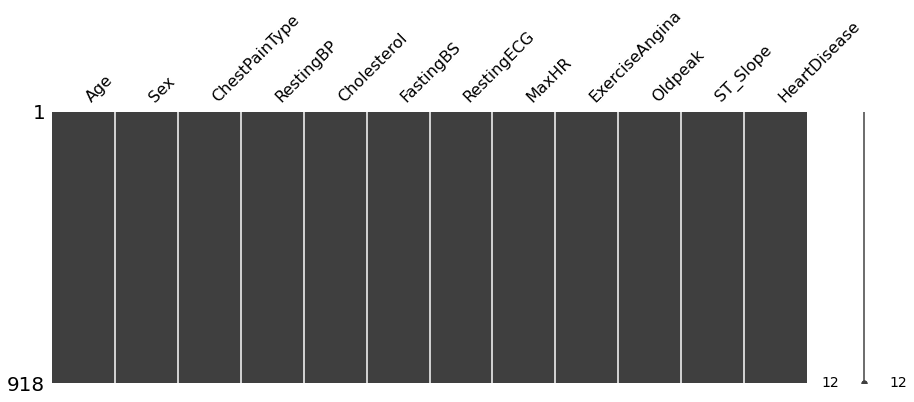

In [13]:
#Removing the duplicate datas.
df.drop_duplicates(keep='first',inplace=True)
df2.drop_duplicates(keep='first',inplace=True)
df3.drop_duplicates(keep='first',inplace=True)
df4.drop_duplicates(keep='first',inplace=True)

#Did not check the datasets for wrong values since they are provided.
##Seeing the datasets' states.
print(df.info(), end="\n")
print(df.isnull().sum(), end="\n")
missingno.matrix(df, figsize=(15, 5))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None
age       0
sex       0
         ..
thal      0
target    0
Length: 14, dtype: int64


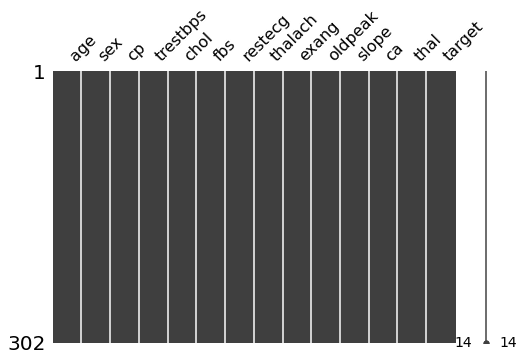

In [22]:
print(df2.info(), end="\n")
print(df2.isnull().sum(), end="\n")
missingno.matrix(df2, figsize=(8, 5))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 407
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     304 non-null    object
 1   Symptom_1   304 non-null    object
 2   Symptom_2   304 non-null    object
 3   Symptom_3   304 non-null    object
 4   Symptom_4   272 non-null    object
 5   Symptom_5   234 non-null    object
 6   Symptom_6   186 non-null    object
 7   Symptom_7   158 non-null    object
 8   Symptom_8   140 non-null    object
 9   Symptom_9   120 non-null    object
 10  Symptom_10  110 non-null    object
 11  Symptom_11  68 non-null     object
 12  Symptom_12  47 non-null     object
 13  Symptom_13  30 non-null     object
 14  Symptom_14  19 non-null     object
 15  Symptom_15  18 non-null     object
 16  Symptom_16  10 non-null     object
 17  Symptom_17  1 non-null      object
dtypes: object(18)
memory usage: 45.1+ KB
None
Disease         0
Symptom_1       0
            

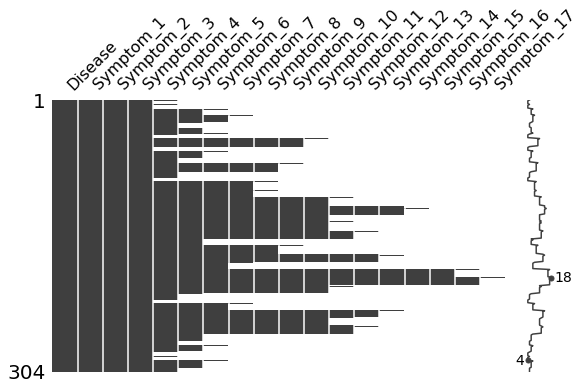

In [21]:
print(df3.info(), end="\n")
print(df3.isnull().sum(), end="\n")
missingno.matrix(df3, figsize=(9, 5))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB
None

Symptom    0
weight     0
dtype: int64



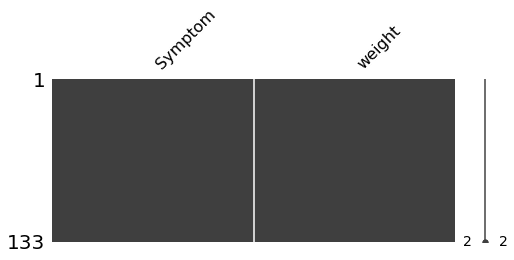

In [20]:
print(df4.info(), end="\n")
print(df4.isnull().sum(), end="\n")
missingno.matrix(df4, figsize=(8, 3))


## Exploration on the datasets.
On this part we tried to understand the datasets to properly arrange the structure of out Machine Learning model.

A general review for the datasets.

In [92]:
#Function used to visualize AUC-ROC later in the Machine Learning part.
def auc_plot(model, x, y, label):
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    auc = roc_auc_score(y,model.predict(x))
    print(label, auc)
    plt.plot(fpr, tpr, label=label)

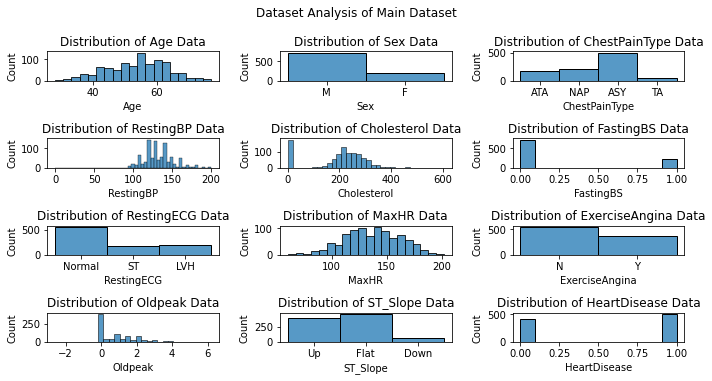

In [62]:
figure = plt.figure(figsize=(10,5))
figure.suptitle("Dataset Analysis of Main Dataset", y=1.05)
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col])
    plt.tight_layout()
    plt.plot()

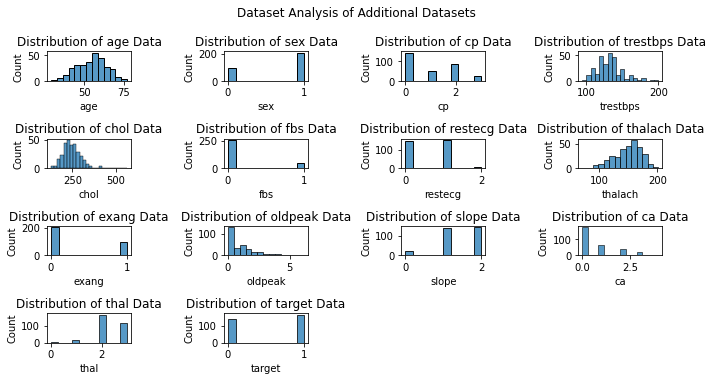

In [39]:
figure = plt.figure(figsize=(10,5))
figure.suptitle("Dataset Analysis of Additional Datasets", y=1.05)
for i,col in enumerate(df2.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    sns.histplot(df2[col])
    plt.plot()

  #Not a correct visual for symptom dataset.

Another approach for the datasets to truly understand the relation between the heart disease.

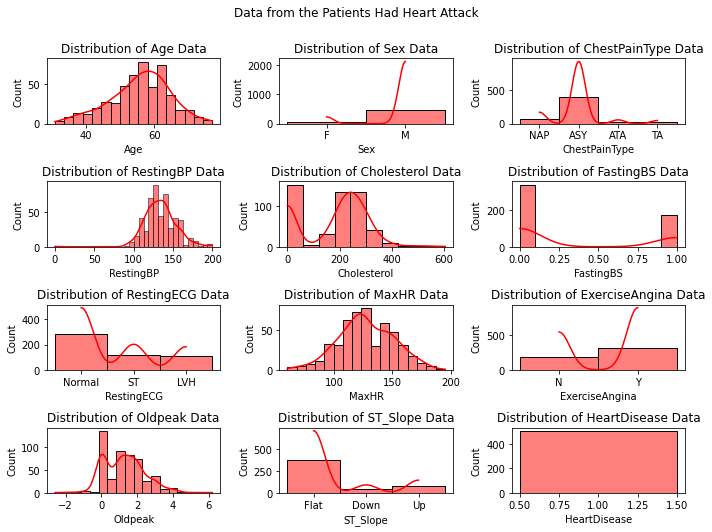

In [60]:
df_heart_failure = df[df['HeartDisease'] == 1]
fig = plt.figure(figsize=(10,7))
fig.suptitle("Data from the Patients Had Heart Attack", y=1.05)
for i,col in enumerate(df_heart_failure.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_heart_failure[col],kde=True, color='red')
    plt.tight_layout()
    plt.plot()

##Machine Learning Model and Prediction

In this part, according to the information we gathered and the brief analysis on the datasets, we have used 2 machine learning methods and tried to create predictions.

* KNN
* Random Forest

Are the methods that we have used.

##Machine Learning Model Implementation


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
import xgboost

##**KNN**
We have chosen this method because it is easy to implement and can be used for both regression and classification situations.

## Data Preparation and Modeling for KNN

In [122]:
df_knn = df
string_col=df.select_dtypes("object").columns.to_list()
string_num= [x for x in df.columns if x not in string_col and x != 'HeartDisease']
# Label Encoding the Dataset with OneHotEncoder.
onehotencoder = OneHotEncoder()
for col in string_col:
    tmp = onehotencoder.fit_transform(df_knn[col].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(tmp, columns = [col+str(int(i)) for i in range(tmp.shape[1])])
    df_knn = pd.concat([df_knn, dfOneHot], axis=1)
    df_knn = df_knn.drop(col, axis=1) 
# Splitting the X and Y.
y_knn = df_knn['HeartDisease']
x_knn = df_knn.drop(['HeartDisease'], axis=1)
x_trainKnn, x_testKnn, y_trainKnn, y_testKnn = train_test_split(x_knn, y_knn, test_size=0.20, random_state=0)
# Scaling the Dataset with a Scaler.
scaler = MinMaxScaler()
scaler.fit(x_trainKnn[string_num])
x_trainScaledKnn = x_trainKnn
x_testScaledKnn = x_testKnn
x_trainScaledKnn[string_num] = scaler.transform(x_trainKnn[string_num])
x_testScaledKnn[string_num] = scaler.transform(x_testKnn[string_num])
# Smote
smoteOBJ = SMOTE(random_state=0)
X_train_smote_knn, y_train_smote_knn = smoteOBJ.fit_resample(x_trainScaledKnn, y_trainKnn)

KNN Execution and train.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


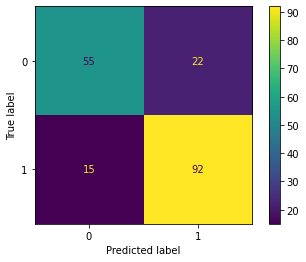

In [128]:
#To observe the roc-auc. 
knn = KNeighborsClassifier()
knn.fit(X_train_smote_knn, y_train_smote_knn)
pred = knn.predict(x_testScaledKnn)
plot_confusion_matrix(knn, x_testScaledKnn, y_testKnn)

KNN 0.787049399198932


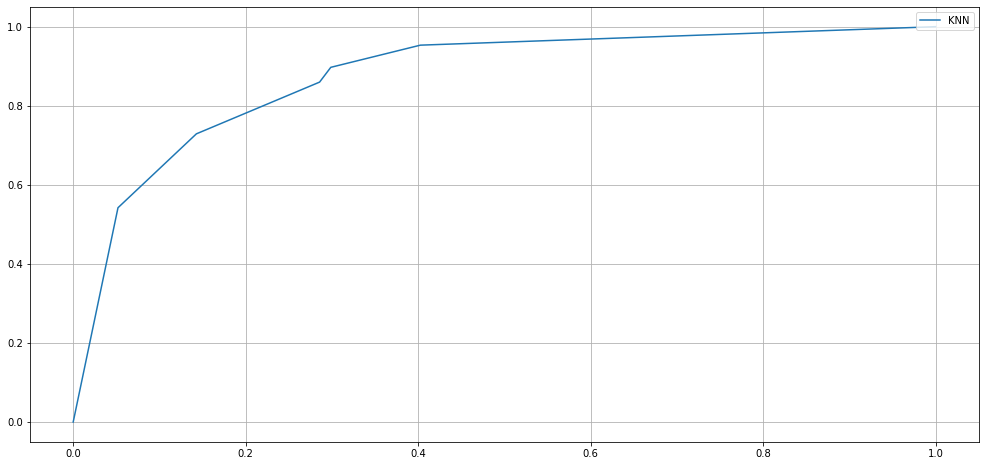

In [129]:
# Seeing the graph of the KNN.

plt.figure(figsize=(17,8))
plt.grid()
auc_plot(knn, x_testScaledKnn, y_testKnn, label="KNN")
plt.legend(loc="upper right")

The conclusion of KNN.

In [ ]:
___________________________________________________________________________________________________________________

##**Random Forest**
The reason behind that we chose Random Forest method as our second is that Random Forest method can be more accurate and it can also both perform regression and classification tasks so that we thought that it can be proper to compare with the KNN.

## Data Preparation and Modeling for Random Forest

In [131]:
string_col=df.select_dtypes("object").columns.to_list()
string_num= [x for x in df.columns if x not in string_col and x != 'HeartDisease']
# Applying the Label Encoder to correctly label the data.
df_rf = df.apply(LabelEncoder().fit_transform)
x_trainRF, x_testRF, y_trainRF, y_testRF = train_test_split(X_rf, Y_rf, test_size=0.20, random_state=0)
# Scaling the dataset to further proceed.
scaler = MinMaxScaler()
scaler.fit(x_trainRF[string_num])
x_trainScaledRF = x_trainRF
x_testScaledRF = x_testRF
x_trainScaledRF[string_num] = scaler.transform(x_trainRF[string_num])
x_testScaledRF[string_num] = scaler.transform(x_testRF[string_num])
# Smote
smoteOBJ = SMOTE(random_state=0)
X_train_smote_rf, y_train_smote_rf = smoteOBJ.fit_resample(x_trainScaledRF, y_trainRF)
# Splitting the X and Y
Y_rf = df_rf['HeartDisease']
X_rf = df_rf.drop(['HeartDisease'], axis=1)

Random Forest Execution and train.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


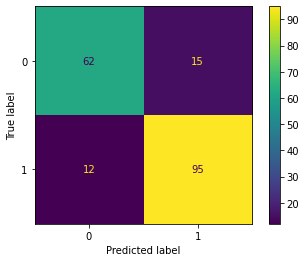

In [132]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train_smote_rf, y_train_smote_rf)
pred = RF.predict(x_testScaledRF)
plot_confusion_matrix(RF, x_testScaledRF, y_testRF)

RF 0.8465226362422624


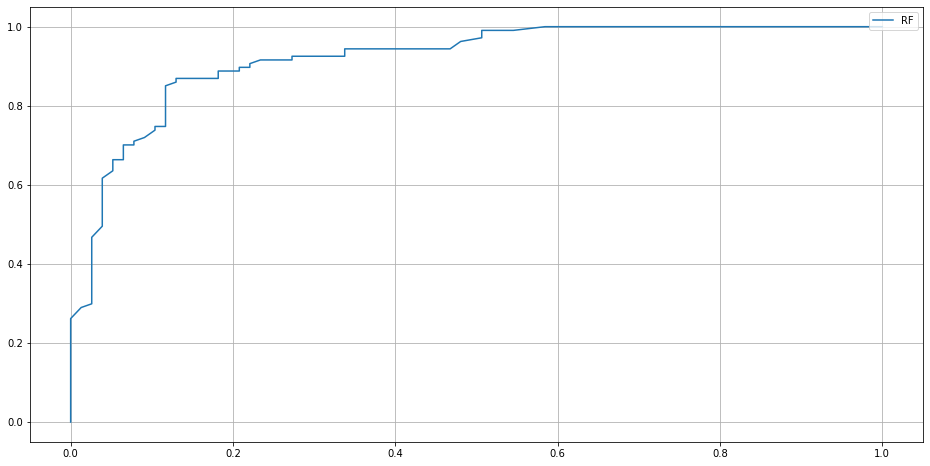

In [133]:
plt.figure(figsize=(16,8))
plt.grid()
auc_plot(RF, x_testScaledRF, y_testRF, label="RF")
plt.legend(loc="upper right")

The conclusion of Random Forest.

##Conclusion


RF 0.8465226362422624
KNN 0.787049399198932


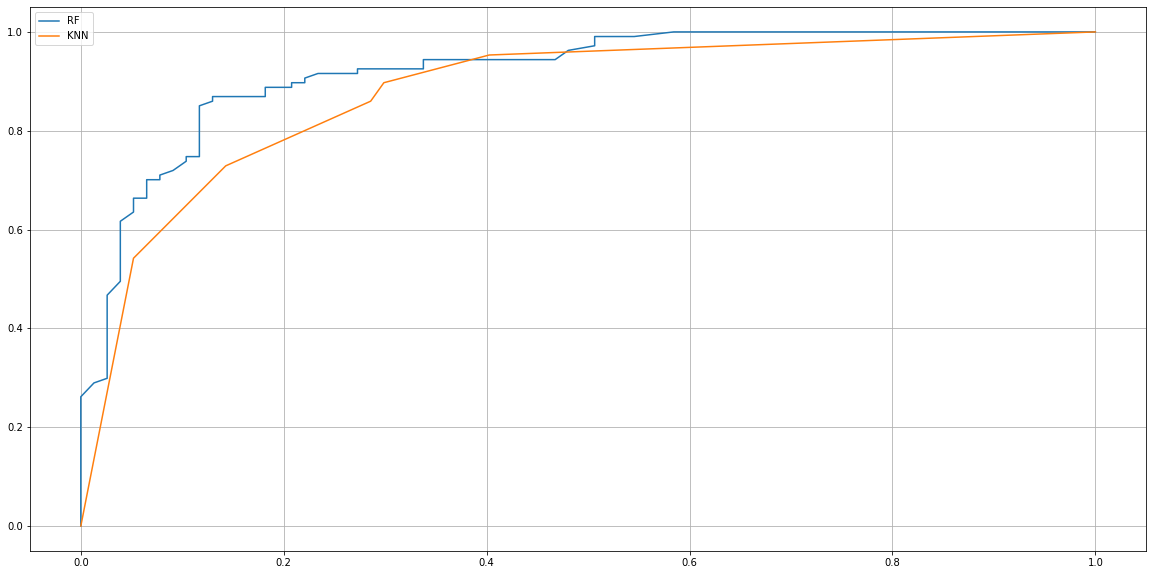

In [134]:
# ROC-AUC both of the conlusions in one graph to compare.
plt.figure(figsize=(20,10))
plt.grid()
auc_plot(RF, x_testScaledRF, y_testRF, label="RF")
auc_plot(knn, x_testScaledKnn, y_testKnn, label="KNN")
plt.legend(loc="upper left")

To conclude, for this project Random Forest could manage to give more accuracy than the KNN with the usage of SMOTE which also uses KNN.

To further develop this project there is need to more date in order to make better predictions. Besides, it can be developed by implementing and testing with other ML methods.

This project can be used in medical areas and help medical enviroment with early predictions and let them to take early pre-cautions to affect people's health situations.

